### Import Data ###

In [4]:
# Import data and take a peek at dataframes
import pandas as pd

train_df = pd.read_csv("C:\\Users\\fsthilaire\Desktop\hd_energy_test\\data\\raw\\train_data.csv")
test_df = pd.read_csv("C:\\Users\\fsthilaire\\Desktop\\hd_energy_test\\data\\raw\\test_data.csv")
train_df

,date,energy,enthalpy
0,2019-06-02,6661.954286,30488.616385
1,2019-06-03,6663.454286,30338.174100
2,2019-06-04,6653.537143,30670.887292
3,2019-06-05,6643.868571,30807.607844
4,2019-06-06,6616.860000,30775.883551
...,...,...,...
454,2020-08-29,7053.522857,44161.951798
455,2020-08-30,6962.922857,41809.277348
456,2020-08-31,6762.042857,38882.500190
457,2020-09-01,6606.548571,37245.478768


In [8]:
# Check for missing data 
print(train_df.isnull().sum())
print(test_df.isnull().sum())

date        0
energy      0
enthalpy    0
dtype: int64
date        0
energy      0
enthalpy    0
dtype: int64


### Visualize data ###

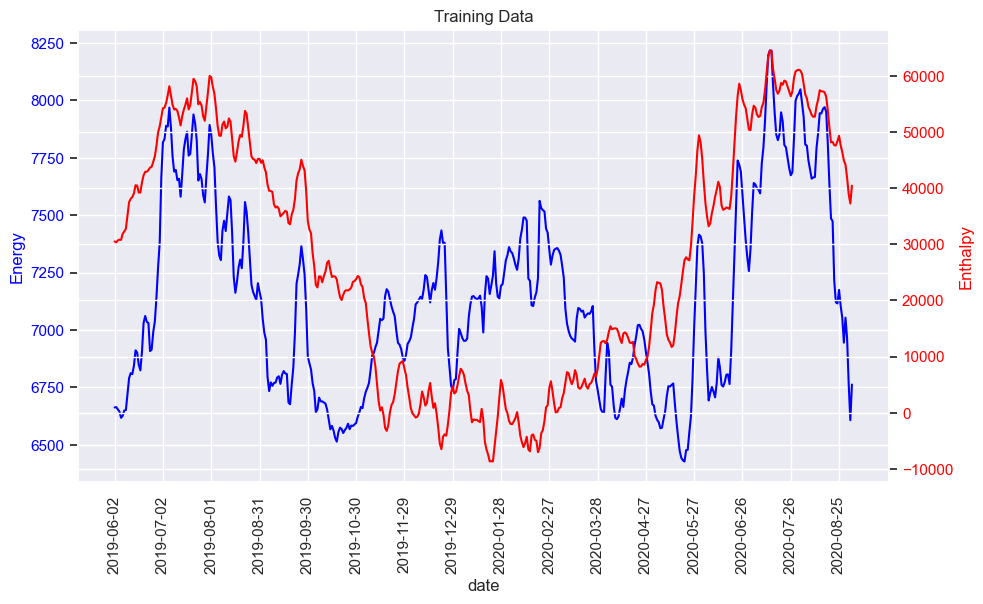

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first curve (left y-axis)
sns.lineplot(data=train_df, x='date', y='energy', ax=ax1, color='blue')
ax1.set_ylabel('Energy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=train_df, x='date', y='enthalpy', ax=ax2, color='red')
ax2.set_ylabel('Enthalpy', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ticks_to_use = train_df['date'].iloc[::30]
ax1.set_xticks(ticks_to_use)
ax1.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
_ = plt.title('Training Data')

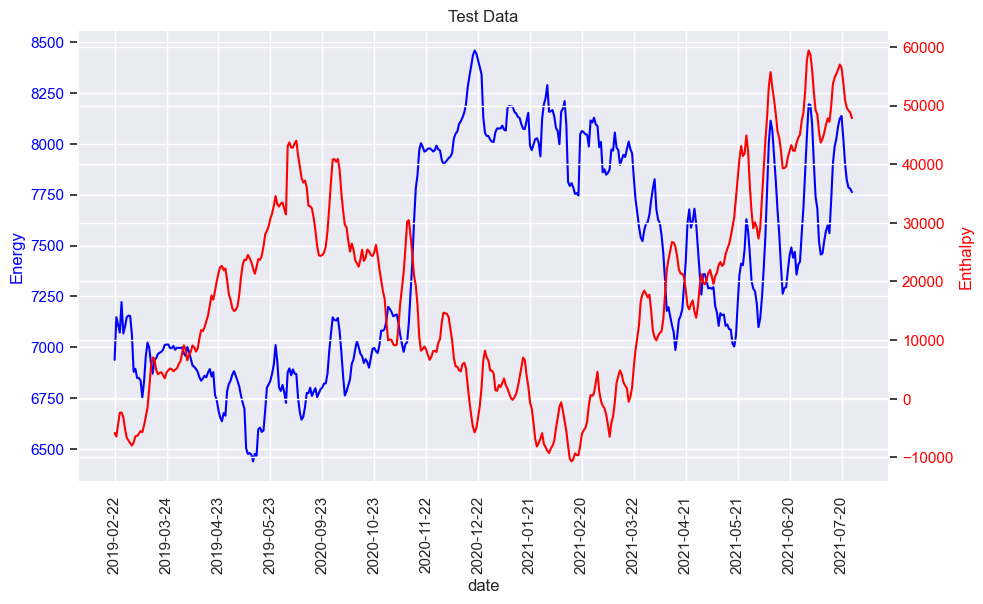

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the first curve (left y-axis)
sns.lineplot(data=test_df, x='date', y='energy', ax=ax1, color='blue')
ax1.set_ylabel('Energy', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis
ax2 = ax1.twinx()
sns.lineplot(data=test_df, x='date', y='enthalpy', ax=ax2, color='red')
ax2.set_ylabel('Enthalpy', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ticks_to_use = test_df['date'].iloc[::30]
ax1.set_xticks(ticks_to_use)
ax1.tick_params(axis='x', labelrotation=90)
plt.tight_layout()
_ = plt.title('Test Data')

### Energy vs Enthalpy  ###

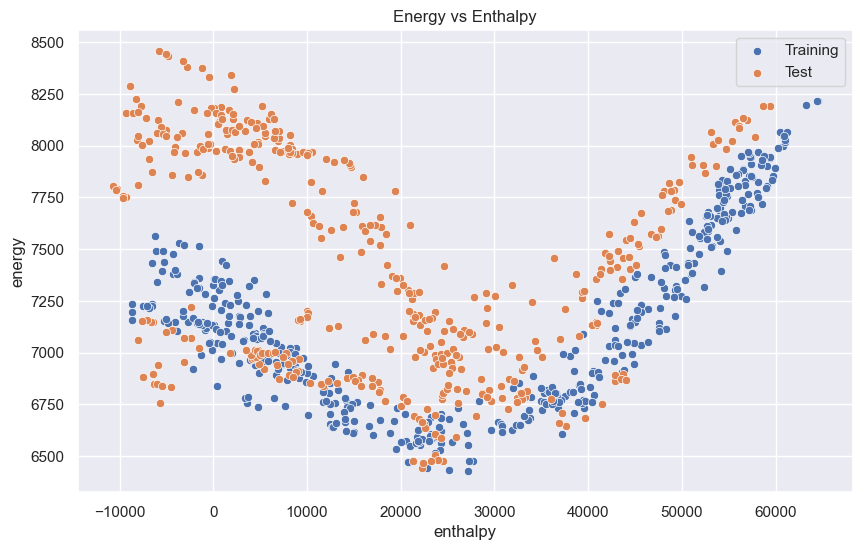

In [38]:
fig = plt.subplots(figsize=(10, 6))

ax1 = sns.scatterplot(data = train_df, x = 'enthalpy', y = 'energy', label = 'Training')
ax2 = sns.scatterplot(data = test_df, x = 'enthalpy', y = 'energy', label = 'Test')
_ = plt.title('Energy vs Enthalpy')

### Remarks
- Looking at the training data, there is a nonlinear U-shape relationship between energy and enthalpy. This makes sense: at high outside temperature (high enthalpy) the store needs more energy to keep cool temperatures inside. At low outside temperature (low enthalpy), the store needs also more energy to keep the inside temperature adequate. 

- We can already see that some of the training data follows a different relationship

## Summary ##
- No missing data, no obvious outliers, data seems clean
- We can assume that any other factor that could affect the store's energy consumption is constant throughout the data, so that the data does not need to be normalized between the training and test sets.
- This is a semi-supervised anomaly detection problem. It could be solved with an isolation forest or SVM with a nonlinear boundary

In [9]:
train_df.date.max()

'2020-09-02'

In [11]:
test_df.date

0      2019-02-22
1      2019-02-23
2      2019-02-24
3      2019-02-25
4      2019-02-26
          ...    
422    2021-07-22
423    2021-07-23
424    2021-07-24
425    2021-07-25
426    2021-07-26
Name: date, Length: 427, dtype: object